In [16]:
# 2.1.0 - Feature engineering BMI

#Data loading
import pandas as pd
cardioData= pd.read_csv('./Data/cardio_train.csv', sep=';')
cardioData.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [17]:
#a)

cardioData = cardioData.drop(cardioData[cardioData.height < 150].index)
cardioData = cardioData.drop(cardioData[cardioData.height > 220].index)
cardioData = cardioData.drop(cardioData[cardioData.weight < 40].index)
cardioData = cardioData.drop(cardioData[cardioData.height > 200].index)
cardioData["BMI"] = cardioData["weight"] / (cardioData["height"]/100)**2
cardioData = cardioData.drop(cardioData[cardioData.BMI < 15].index)
cardioData = cardioData.drop(cardioData[cardioData.BMI > 45].index)
len(cardioData)


67946

<AxesSubplot:xlabel='weight', ylabel='height'>

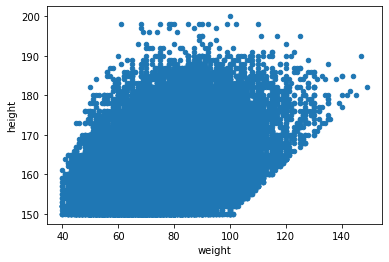

In [18]:
#new scatter plot after dropping rows
cardioData.plot.scatter("weight", "height")

In [19]:
# BMI range from https://www.cdc.gov/obesity/adult/defining.html
#If your BMI is 18.5 to <25, it falls within the healthy weight range.
#If your BMI is 25.0 to <30, it falls within the overweight range.
#Class 1: BMI of 30 to < 35
#Class 2: BMI of 35 to < 40
#Class 3: BMI of 40 or higher. 

#code example is taken from https://www.dataquest.io/blog/tutorial-add-column-pandas-dataframe-based-on-if-else-condition/
import numpy as np


conditions = [
    (cardioData['BMI'] <= 18.5),
    (cardioData['BMI'] > 18.5) & (cardioData['BMI'] <= 25),
    (cardioData['BMI'] > 25) & (cardioData['BMI'] <= 30),
    (cardioData['BMI'] > 30) & (cardioData['BMI'] <= 35),
    (cardioData['BMI'] > 35) & (cardioData['BMI'] <= 40),
    (cardioData['BMI'] > 40)
    ]

values = ['Underweight','Normal range', 'Overweight', 'Obese(Class1)', 'Obese(Class2)', 'Obese(Class3)']

cardioData['BMI_Range'] = np.select(conditions, values)
cardioData


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,BMI_Range
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,Normal range
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,Obese(Class1)
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,Normal range
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,Overweight
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,Normal range
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,99992,21074,1,165,80.0,150,80,1,1,0,0,1,1,29.384757,Overweight
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,26.927438,Overweight
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,31.353579,Obese(Class1)
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,27.099251,Overweight


## 2.1.1 Feature engineering blodtryck

In [20]:
#a)
cardioData = cardioData.drop(cardioData[cardioData.ap_hi < 70].index)
cardioData = cardioData.drop(cardioData[cardioData.ap_hi > 230].index)
cardioData = cardioData.drop(cardioData[cardioData.ap_lo < 50].index)
cardioData = cardioData.drop(cardioData[cardioData.ap_lo > 160].index)
len(cardioData)

66740

In [23]:
conditions2 = [
    (cardioData['ap_lo'] < 80) & (cardioData['ap_hi'] < 120),
    (cardioData['ap_hi'] >= 120) & (cardioData['ap_hi'] <= 129) & (cardioData['ap_lo'] < 80),
    (cardioData['ap_lo'] > 80) & (cardioData['ap_lo'] <= 89) & (cardioData['ap_hi'] > 129) & (cardioData['ap_hi'] <= 139),
    (cardioData['ap_lo'] > 89) & (cardioData['ap_lo'] <= 119) & (cardioData['ap_hi'] > 139) & (cardioData['ap_hi'] <= 180),
    (cardioData['ap_lo'] > 180), (cardioData['ap_hi'] > 120)
    ]

values2 = ['Healthy','Elevated', 'Stage 1 Hypertension', 'Stage 2 Hypertension', 'Hypertension crisis', 'Hypertension crisis']

cardioData['AP_categories'] = np.select(conditions2, values2)
cardioData['AP_categories']

0                           0
1        Stage 2 Hypertension
2         Hypertension crisis
3        Stage 2 Hypertension
4                     Healthy
                 ...         
69994     Hypertension crisis
69995                       0
69997    Stage 2 Hypertension
69998     Hypertension crisis
69999                       0
Name: AP_categories, Length: 66740, dtype: object